### Exploratory Data Analysis

In [1]:
from configurations_dataprep import * # import the configuration file created
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

For this EDA we will use the TRAIN dataset generated during data preparation

In [2]:
data_train.head(10) # preview the TRAIN dataset

,Price,Unnamed: 0,Address,Zip,Area,Room,Lon,Lat
0,425000.0,98,"Lamarckhof 11 I, Amsterdam",1098 TK,68,3,4.944251,52.352317
1,520000.0,228,"Kiefskamp 24, Amsterdam",1082 KA,80,2,4.872336,52.330330
2,700000.0,693,"Latherusstraat 54, Amsterdam",1032 EC,123,6,4.915060,52.393449
3,295000.0,588,"1e Kekerstraat 119, Amsterdam",1104 VA,91,3,4.981371,52.313749
4,650000.0,885,"Nieuwevaartweg, Amsterdam",1019 AL,87,4,4.954376,52.367982
5,275000.0,658,"Tefelenstraat 82, Amsterdam",1107 SM,111,5,4.970438,52.294244
6,549001.0,801,"Lange Stammerdijk 1 G, Amsterdam",1109 BK,107,4,5.016522,52.305075
7,350000.0,26,"Bruinvisstraat 36, Amsterdam",1035 HG,89,3,4.885160,52.423543
8,485000.0,85,"Admiraliteitstraat 48, Amsterdam",1018 KP,73,4,4.924634,52.368555
9,540000.0,11,"Sloterkade 152 1, Amsterdam",1058 HN,69,3,4.851985,52.351244


In [3]:
data_train = data_train.drop('Unnamed: 0', axis=1) # Remove 'Unnamed= 0' column
data_train.columns

Index(['Price', 'Address', 'Zip', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

One step is to save the type of features into a dataset for later use

In [4]:
data_type_df = pd.DataFrame.from_dict(
    {
        "Price": "continuous", # target feature
        "Address": "nominal",
        "Zip": "nominal",
        "Area": "continuous",
        "Room": "discrete",
        "Lon": "continuous",
        "Lat": "continuous",
    },
    orient="index",
    columns=["data_type"],
)
data_type_df.transpose()

,Price,Address,Zip,Area,Room,Lon,Lat
data_type,continuous,nominal,nominal,continuous,discrete,continuous,continuous


##### Missing Values

In [5]:
# preview only the missing values only
display(data_train[data_train.isna().any(axis=1)])

,Price,Address,Zip,Area,Room,Lon,Lat
11,NaN,"Haarlemmerweg 705, Amsterdam",1067 HP,366,12,4.787874,52.383877
132,NaN,"Falckstraat 47 A, Amsterdam",1017 VV,147,3,4.897454,52.360707
456,NaN,"Zeeburgerkade 760, Amsterdam",1019 HT,107,3,4.945022,52.369244
593,NaN,"Suikerplein 16, Amsterdam",1013 CK,81,3,4.880976,52.389623


In [6]:
# remove rows with missing values.
# In this case they are not going to make a huge difference in our predictions
data_train = data_train.dropna()

### Data Visualization

**Nominal Distributions**

In [8]:
# get the list of features
list_nominal = data_type_df.loc[lambda x: x["data_type"] == "nominal"].index 

**Ordinal Distributions**

In [9]:
# get the list of features
list_ordinal = data_type_df.loc[lambda x: x["data_type"] == "ordinal"].index 

**Discrete Distributions**

In [10]:
# get the list of features
list_discrete = data_type_df.loc[lambda x: x["data_type"] == "discrete"].index 

<Axes: xlabel='Room', ylabel='Count'>

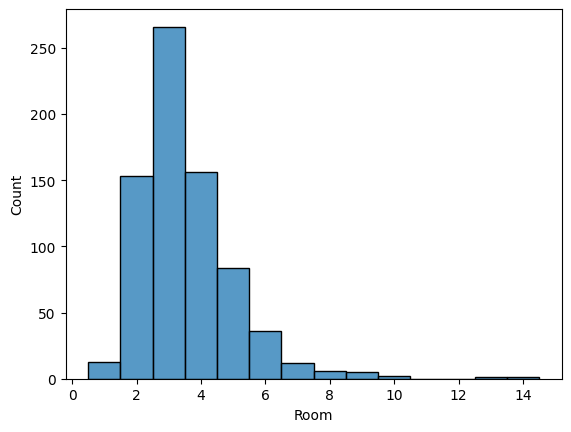

In [11]:
# visualize the distribution for discrete features
sns.histplot(data=data_train, x=list_discrete[0], binwidth=3, bins=40, discrete=True)

**Continuous Distributions**

In [12]:
# get the list of features
list_continuous = data_type_df.loc[lambda x: x["data_type"] == "continuous"].index 

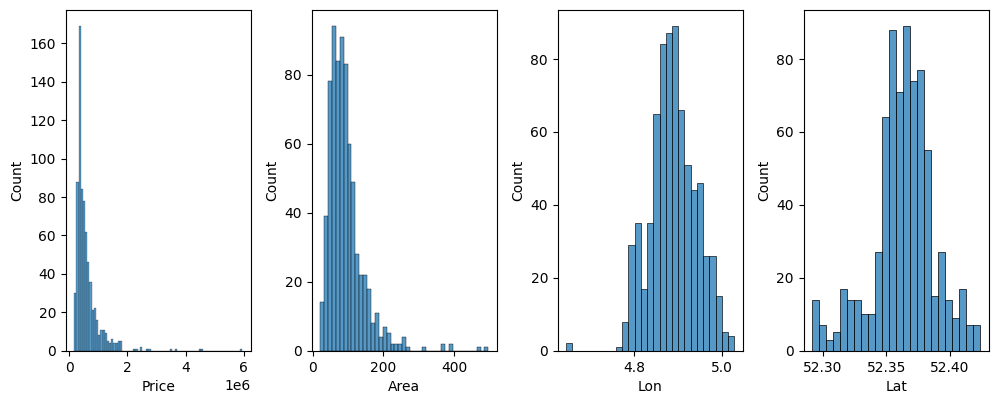

In [13]:
# visualize the distribution for continuous features
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 4))
fig.tight_layout(w_pad=1.0)

for i in range(0, axs.shape[0]):
    sns.histplot(data=data_train, x=list_continuous[i], discrete=False, ax=axs[i])

**Key Results**

- ```Price``` and ```Area``` are highly right-skewed. Wereas ```Lon``` and ```Lat``` (coordinates) are fairly normally distributed (*Gaussian Distribution*).
- ```Room``` seems to be slightly right-skewed.

### Outliers Analysis

In [14]:
# initialize empty dataframe
df_outlier = pd.DataFrame()

# select threshold between {3,4}
thr = 3

# generate summary of outlier
for feat in list(list_discrete) + list(list_continuous):
    df_outlier = pd.concat(
        [
            df_outlier,
            pd.DataFrame(
                data={
                    f"mean": round(data_train[feat].mean(), 2),
                    f"{thr}xstd": round(thr * data_train[feat].std(), 2),
                    f"n outlier ({thr} x std)": data_train.loc[
                        lambda x: x[feat] > x[feat].mean() + thr * x[feat].std(), feat
                    ].count(),
                    f"% outlier ({thr} x std)": str(
                        round(
                            data_train.loc[
                                lambda x: x[feat]
                                > x[feat].mean() + thr * x[feat].std(),
                                feat,
                            ].count()
                            / data_train.shape[0],
                            2,
                        )
                        * 100
                    )
                    + "%",
                },
                index=[feat],
            ),
        ]
    )

display(df_outlier)
print("Note: outliers are defined e.g. as values above the mean + 3 x std")

,mean,3xstd,n outlier (3 x std),% outlier (3 x std)
Room,3.54,4.50,9,1.0%
Price,605929.67,1456688.11,11,1.0%
Area,93.97,157.02,12,2.0%
Lon,4.89,0.16,0,0.0%
Lat,52.36,0.07,0,0.0%


Note: outliers are defined e.g. as values above the mean + 3 x std


**EDA Summary**<br>
<br>
- The data includes:
    - 4 continuous features
    - 1 descrete feature
    - 2 nominal features
- Missing values were 4 only on target feature ```Price```. Missing values have been removed as they will not affet prediction of our model.
- Distributions
    - Discrete feature ```Room``` slightly right-skewed
    - Continuous features ```Price``` and ```Area``` heavily right-skewed while ```Lon``` and ```Lat``` (coordinates) are fairly normally distributed (*Gaussian Distribution*)
- Transformations
    - Log-transformation for normalizing highly skewed distributions
    - Clustering to limit group imbalance, that will also limit skewness
    - Feature engineering might be useful to improve the model generalization

#### Summary Statistics

In [15]:
# for TARGET feature 'Price'
print(
    f"o Dutch House {TARGET} has a mean (std) of {int(data_train[TARGET].mean())} ({int(data_train[TARGET].std())}) EUR"
)
print(f"o The Median value of {TARGET} is {int(data_train[TARGET].median())} EUR")
print(
    f"o The Mininum value of {TARGET} is {int(data_train[TARGET].min())} EUR with an Area of {data_train.loc[data_train[TARGET].idxmin(), 'Area']} m2 and {data_train.loc[data[TARGET].idxmin(), 'Room']} room"
)
print(
    f"o The Maximum value of {TARGET} is {int(data_train[TARGET].max())} EUR with an Area of {data_train.loc[data[TARGET].idxmax(), 'Area']} m2 and {data_train.loc[data[TARGET].idxmax(), 'Room']} room"
)
print(
    f"o 25% and 75% of the Dutch House {TARGET} are {int(data_train[TARGET].quantile(0.25))} and {int(data_train[TARGET].quantile(0.75))} EUR, respectively"
)

o Dutch House Price has a mean (std) of 605929 (485562) EUR
o The Median value of Price is 465000 EUR
o The Mininum value of Price is 175000 EUR with an Area of 28 m2 and 4 room
o The Maximum value of Price is 5950000 EUR with an Area of 40 m2 and 2 room
o 25% and 75% of the Dutch House Price are 350000 and 688750 EUR, respectively
